# COMP24111 - Exercise 3: _Face recognition_

## 1. Task description

You will work on a face recognition task. The provided dataset includes face images of 40 subjects. There are a total of 400 images, with 10 images per subject. Each image contains 32×32=1024 pixels, with 256 grey levels per pixel.

## 2. Preparation

### Setting up

The functions that you need are defined in the source file we have provided you with. To use them you must import it first:

In [1]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces

Now you can load the data:

In [2]:
import numpy as np
from matplotlib import pyplot as plt
data, labels = load_data()

### Visualising the dataset

You can observe the faces stored in a data matrix by using the functions `show_single_face()` and `show_faces()`.

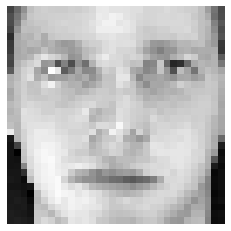

In [3]:
# Display a single example.
# only comment in first part as second is dimensions
show_single_face(data[0, :])

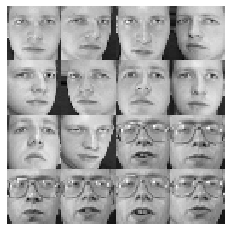

In [4]:
# Display the first 16 examples in a 4x4 grid.
show_faces(data[:16, :], num_per_row=4)

### Splitting into train and test set

A data partition function is supplied to facilitate your experiments. It randomly splits the provided data into the training and test sets, where the training set contains $N$ samples per class and the test set contains
the remaining samples. It takes the labels and the specified number $N$ as the input. It returns the sample indices in the training and test set. For example, the following code divides a given set of 400 samples into a training set containing 3 samples per subject and a test set containing 7 samples per subject:

In [5]:
tr_ind, te_ind = partition_data(labels[:], num_per_class=3)
tr_data = data[tr_ind, :]
tr_label = labels[tr_ind]
te_data = data[te_ind, :]
te_label = labels[te_ind]

120
[  0   7   9  11  16  18  22  26  27  34  38  39  41  43  46  50  52  59
  60  61  66  71  74  76  82  85  89  92  95  98 100 107 108 110 112 119
 120 123 128 132 137 139 143 148 149 151 155 159 161 165 169 171 175 177
 184 186 189 191 194 199 201 204 205 211 213 218 220 222 227 230 233 238
 244 246 249 254 255 256 265 266 268 271 273 277 282 286 287 290 293 298
 303 304 306 310 313 318 322 327 329 332 337 339 340 344 348 351 352 359
 361 362 363 372 373 375 381 384 386 390 391 397]


## 3. $L_2$-regularised least squares implementation

Now, you will need to implement the function `l2_rls_train` below. It should train a linear model by minimising the $L_2$-regularised sum of squares loss using the normal equations (this is called $L_2$*-regularised least squares model*, or *ridge regression model*). It should support both single-output and multi-output cases. This function should take a set of training samples and a user-specified regularisation parameter $\lambda$ as the input, and return the predicted weights.

In [6]:


def l2_rls_train(tr_data, tr_labels, lammbda):
    """
    This function is used to find a model weight for training; using the normal equation.

    data: matrix of data inputs of the samples faces
    labels: type and description of "labels"

    Returns: matrix of model weights.
    """
    
    # This is just to be consistent with the lecture notes.
    X, y = tr_data, tr_labels
    
    # Expand X with a column of ones.
    # np.ones creates a 1 column matrix of 1s with 40 entries, this is then concantenated to the start of the
    #training sample matrix
    X_tilde = np.append(np.ones((X.shape[0],1)),X, axis = 1)
    
    X_pinv = np.linalg.pinv(X_tilde)
    
    # Compute the coefficient vector.
    if lammbda == 0:
        w =  (X_pinv @ y)
    else:
        calc_X = np.linalg.inv((X_tilde.T @ X_tilde) + (lammbda * np.eye(X_tilde[0].size)))
        w = calc_X @ (X_tilde.T @ y)
        
    
    # Return model parameters.
    return w



Once you have trained your model, you can use it on to predict new data. Implement the following function to do this.

In [7]:
def l2_rls_predict(w, data):
    """
    A summary of your function goes here.

    data: type and description of "data"

    Returns: type and description of the returned variable(s).
    """
    
    # This is just to be consistent with the lecture notes.
    X = data
    X_tilde = np.append(np.ones((X.shape[0],1)),X, axis = 1)
    predicted_y = X_tilde @ w
    # Your code goes here
    
    return predicted_y

## 4. Experiments

Start to use your functions `l2_rls_train` and `l2_rls_predict` to perform the following experiments.

### Experiment 1: Binary Classification

Start with a binary classification task to classify face images for subjects “1” and “30”.

Train three classifiers:
1. Set $y=-1$ for samples from “1” and $y=+1$ for samples from “30” to train a linear model, and use the threshold $T= 0$ to obtain the class prediction.
2. Set $y=0$ for samples from “1” and $y=1$ for samples from “30” to train a linear model, and use the threshold $T= 0.5$ to obtain the class prediction.
2. Set $y=1$ for samples from “1” and $y=30$ for samples from “30” to train a linear model, and use the threshold $T= 15.5$ to obtain the class prediction.

Randomly select 3 images per subject for training, and use the remaining images for testing. Train your classifier 1 and test it with a fixed regularisation parameter $\lambda$=0. Repeat this process 50 times and record the training and test errors.

In [8]:
def exp1(label_class_1, label_class_30):
    # Map the labels and partition the data
    # 3 images per sample for training data; 7 for testing data
    # sample 1 testing and training data
    tr_ind_1, te_ind_1 = partition_data(labels[0:10], num_per_class=3)
    
    tr_data_1 = data[tr_ind_1, :]
    tr_label_1 = labels[tr_ind_1]
    
    # changes the training y to label_class_1
    tr_y_1 = np.full_like(tr_label_1, label_class_1)
    
    te_data_1 = data[te_ind_1, :]
    te_label_1 = labels[te_ind_1]
    
    # changes the testing y output to label_class_1
    te_y_1 = np.full_like(te_label_1, label_class_1)
    
    # sample 30 testing and training data
    tr_ind_30, te_ind_30 = partition_data(labels[290:300], num_per_class=3)
    
    tr_data_30 = data[tr_ind_30, :]
    tr_label_30 = labels[tr_ind_30]
    
    # changes the training y output to label_class_30
    tr_y_30 = np.full_like(tr_label_30, label_class_30)
    
    te_data_30 = data[te_ind_30, :]
    te_label_30 = labels[te_ind_30]
    
    te_y_30 = np.full_like(te_label_30, label_class_30)
    # append sample data matrices together
    #training dataset
    # concatenates vertically
    tr_data = np.concatenate((tr_data_1, tr_data_30), axis=0)
    tr_labels = np.concatenate((tr_y_1, tr_y_30), axis=0)
    
    #testing dataset
    te_data = np.concatenate((te_data_1, te_data_30), axis=0)
    te_labels = np.concatenate((te_y_1, te_y_30), axis=0)
#---------------------------------------------------------------------------
    # Train your model
    w = l2_rls_train(tr_data, tr_labels, 0)
    
    # estimates output of samples
    
    # Define the threshold
    T = (label_class_1 + label_class_30)/2
    
    # Perform prediction for training and compute the training error
    tr_pred = l2_rls_predict(w, tr_data)
    # append method creates a one dimensional array
    # counts the incorrect predictions then divides by the total samples
    tr_err = np.count_nonzero((tr_pred > T) != (tr_labels > T)) / tr_labels.shape[0]
    
    # Perform prediction for testing and compute the test error
    te_pred = l2_rls_predict(w,te_data)
    te_err = np.count_nonzero((te_pred > T) != (te_labels > T)) / te_labels.shape[0]
    

    return tr_err, te_err

In [9]:
# Use the `exp1()` function to experiment with classifier 1.
# Your code goes here.
c1_te_list = []
for i in range(50):
    c1_tr_err, c1_te_err = exp1(-1,1)
    print("experiment %d: training - %f, testing - %f" % (i+1, c1_tr_err, c1_te_err))
    c1_te_list.append(c1_te_err)


experiment 1: training - 0.000000, testing - 0.000000
experiment 2: training - 0.000000, testing - 0.142857
experiment 3: training - 0.000000, testing - 0.000000
experiment 4: training - 0.000000, testing - 0.000000
experiment 5: training - 0.000000, testing - 0.142857
experiment 6: training - 0.000000, testing - 0.000000
experiment 7: training - 0.000000, testing - 0.000000
experiment 8: training - 0.000000, testing - 0.000000
experiment 9: training - 0.000000, testing - 0.000000
experiment 10: training - 0.000000, testing - 0.142857
experiment 11: training - 0.000000, testing - 0.000000
experiment 12: training - 0.000000, testing - 0.142857
experiment 13: training - 0.000000, testing - 0.142857
experiment 14: training - 0.000000, testing - 0.142857
experiment 15: training - 0.000000, testing - 0.000000
experiment 16: training - 0.000000, testing - 0.000000
experiment 17: training - 0.000000, testing - 0.000000
experiment 18: training - 0.000000, testing - 0.000000
experiment 19: trai

Repeat the same experiment for classifier 2.

In [10]:
# Use the `exp1()` function to experiment with classifier 2.
# Your code goes here.
c2_te_list = []
for i in range(50):
    c2_tr_err, c2_te_err = exp1(0,1)
    print("experiment %d: training - %f, testing - %f" % (i+1, c2_tr_err, c2_te_err))
    c2_te_list.append(c2_te_err)


experiment 1: training - 0.333333, testing - 0.571429
experiment 2: training - 0.166667, testing - 0.642857
experiment 3: training - 0.000000, testing - 0.714286
experiment 4: training - 0.166667, testing - 0.642857
experiment 5: training - 0.166667, testing - 0.642857
experiment 6: training - 0.166667, testing - 0.642857
experiment 7: training - 0.000000, testing - 0.714286
experiment 8: training - 0.166667, testing - 0.642857
experiment 9: training - 0.333333, testing - 0.571429
experiment 10: training - 0.000000, testing - 0.714286
experiment 11: training - 0.000000, testing - 0.714286
experiment 12: training - 0.000000, testing - 0.714286
experiment 13: training - 0.166667, testing - 0.642857
experiment 14: training - 0.166667, testing - 0.642857
experiment 15: training - 0.166667, testing - 0.642857
experiment 16: training - 0.166667, testing - 0.642857
experiment 17: training - 0.166667, testing - 0.642857
experiment 18: training - 0.333333, testing - 0.571429
experiment 19: trai

Repeat the same experiment for classifier 3.

In [11]:
# Use the `exp1()` function to experiment with classifier 3.
# Your code goes here.
c3_te_list = []
c3_tr_err, c3_te_err = exp1(1,30)
for i in range(50):
    c3_tr_err, c3_te_err = exp1(1,30)
    print("experiment %d: training - %f, testing - %f" % (i+1, c3_tr_err, c3_te_err))
    c3_te_list.append(c2_te_err)

experiment 1: training - 0.166667, testing - 0.642857
experiment 2: training - 0.000000, testing - 0.714286
experiment 3: training - 0.166667, testing - 0.642857
experiment 4: training - 0.333333, testing - 0.571429
experiment 5: training - 0.333333, testing - 0.571429
experiment 6: training - 0.166667, testing - 0.642857
experiment 7: training - 0.166667, testing - 0.642857
experiment 8: training - 0.166667, testing - 0.642857
experiment 9: training - 0.166667, testing - 0.642857
experiment 10: training - 0.166667, testing - 0.642857
experiment 11: training - 0.333333, testing - 0.571429
experiment 12: training - 0.166667, testing - 0.642857
experiment 13: training - 0.166667, testing - 0.642857
experiment 14: training - 0.166667, testing - 0.642857
experiment 15: training - 0.000000, testing - 0.714286
experiment 16: training - 0.166667, testing - 0.642857
experiment 17: training - 0.333333, testing - 0.571429
experiment 18: training - 0.000000, testing - 0.714286
experiment 19: trai

Print the test error mean and standard deviation of the three classifiers and display them in the same plot.

Test Error Mean: Classifier 1: 0.03142857142857143
Standard Deviation Classifier 1:  0.06571428571428573


Test Error Mean: Classifier 2:  0.6485714285714286
Standard Deviation Classifier 2:  0.047034507523298096


Test Error Mean: Classifier 3:  0.6428571428571429
Standard Deviation Classifier 3:  0.0




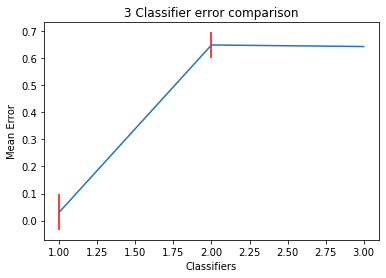

In [12]:
print('Test Error Mean: Classifier 1:', np.mean(c1_te_list))
print('Standard Deviation Classifier 1: ', np.std(c1_te_list))
print('\n')

print('Test Error Mean: Classifier 2: ', np.mean(c2_te_list))
print('Standard Deviation Classifier 2: ', np.std(c2_te_list))
print('\n')

print('Test Error Mean: Classifier 3: ', np.mean(c3_te_list))
print('Standard Deviation Classifier 3: ', np.std(c3_te_list))
print('\n')

xgraph = np.arange(1, 4, 1)
ygraph = np.array([np.mean(c1_te_list), np.mean(c2_te_list), np.mean(c3_te_list)])
y_err = np.array([np.std(c1_te_list), np.std(c2_te_list), np.std(c3_te_list)])
plt.errorbar(xgraph, ygraph, y_err, ecolor = 'r')
plt.title("3 Classifier error comparison")
plt.xlabel("Classifiers")
plt.ylabel("Mean Error")
plt.show()

Compare the three classifiers and comment on your results.

What training accuracies do you obtain with your linear classifier? Explain the reason.

Between subjects “1” and “30”, which one is more difficult for the linear classifier to recognise? Explain it.

### Experiment 2: Multi-class Classification

Now, proceed to the multi-class classification task to classify face images for all the 40 subjects. Decide an appropriate way to set your target output and make class prediction. 

Split your data to two sets: the training set contains 5 randomly selected images per subject and the test set contains the remaining images. The training set is used to train the model and select hyper-parameter $\lambda$, while the test set is only for final assessment of the trained classifier with the selected $\lambda$. 

Design an appropriate and complete machine learning experiment, which should include the training, hyper-parameter selection and evaluation stages. You can choose from the random subsampling, $k$-fold CV and LOO approaches for hyper-parameter selection. 

Write your code below and make sure it compiles. Show your code to the TA, explain your classifier and experiment design.

In [13]:
def hyperparameter_selection(# Add your arguments here
                            ):
    """
    Finds the best value for lambda using some method of hyperparameter selection.
    """
    # Your code goes here
    return best_lambda

In [14]:
# Your code goes here

Analyse the classification results, and pick some subjects that are considered the most difficult to recognise by your classifier. Show and explain it to the TA.

### Experiment 3: Face Completion

Revise the “Regression Example II” on face completion in Chapter 2. The task is to guess the 512 pixels of the right face from the 512 pixels of the left face. 

The following command can be used to extract the left and right faces from the input data.

In [15]:
left, right = split_left_right(data)

And you can visualise them with the function `show_split_faces()`:

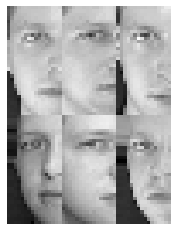

In [16]:
show_split_faces(left[:6, :], num_per_row=3)

Build a face completion model using your functions `l2_rls_train` and `l2_rls_predict`. Design an experiment to assess your model, which should include appropriate training and testing. Use mean absolute percentage error to evaluate the regression performance. You do not need to bother with hyper-parameter selection, but simply set $\lambda$=0.

Write your code below and make sure it compiles. Show your code to the TA, explain your model and experiment design, and demonstrate results.

In [17]:

    # 5 training samples 5 testing samples
    tr_ind, te_ind = partition_data(labels[:], num_per_class=5)
    tr_data = data[tr_ind, :]
    te_data = data[te_ind, :]
    
    # split image data into sides; left and right
    
    # ------------training----------------------
    tr_left, tr_right = split_left_right(tr_data)
    
    # ------------testing -----------------------
    te_left, te_right = split_left_right(te_data)
    
    # train function w: (left side training sample, right side training sample, 0)
    w = l2_rls_train(tr_left, tr_right, 0)
    
    # predict function: (weight w, left side testing sample)
    predicted_right = l2_rls_predict(w, te_left)
    
    

Visualise and compare the ground truth face (include both the left and right parts) and the completed face (include both the true left and predicted right parts) for 3 randomly chosen testing samples below. You can use `join_left_right(left, right)` to concatenate the left and right halves of a set of faces.

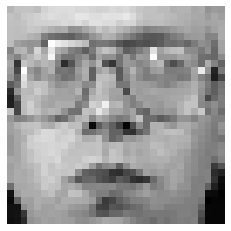

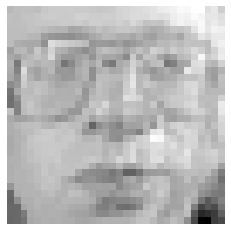

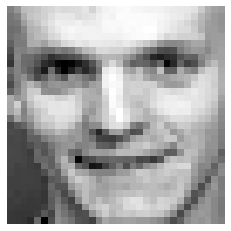

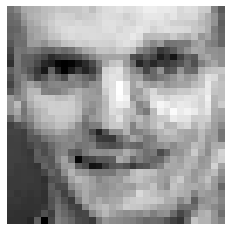

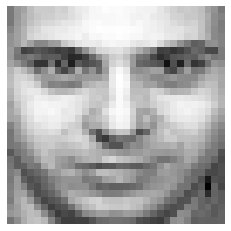

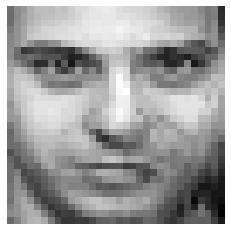

In [18]:
    # joins the left test sample with the right test sample
    te_list = join_left_right(te_left, predicted_right)    
    
    show_single_face(te_data[6, :])
    show_single_face(te_list[6, :])

    show_single_face(te_data[23, :])
    show_single_face(te_list[23, :])
    
    show_single_face(te_data[43, :])
    show_single_face(te_list[43, :])

Does your model work well? Comment on it.